# The global data journalists and their Github contributions: a case study from the Global Data Journalist Directory
I scraped the [Global Data Journalist Directory](http://jplusplus.github.io/global-directory/) from github website. There are 217 so-called journalists in this directory and I get their locations through this dataset. Meanwhile, a 

In [9]:
import plotly.plotly as py
import pandas as pd

def country2code(t):
    df_c2c = pd.read_csv(
        'reference/country2code.csv',
        names=['country','country_code'])  #reference/country2code.csv是转换器文件
    dict_country2code = df_c2c.set_index(
                        'country').T  #country2code的dataframe轉化為字典
    return dict_country2code[t.split(', ')[-1]][0]  #将所有记者的country转化为code

def code2country(t):
    df_c2c = pd.read_csv(
        'reference/code&country.csv',
        names=['country_code','country'])  #reference/country2code.csv是转换器文件
    dict_code2country = df_c2c.set_index(
                        'country_code').T  #country2code的dataframe轉化為字典
    return dict_code2country[t][0]  #将所有记者的country转化为code

def paint_world_map_choropleth(title,locations,z,ztitle,filename):
    data = [ dict(
            type = 'choropleth',
            locations = locations,  #重要！國家代碼，可使用上面的方法把國家名轉化為代碼
            z = z,  #重要！數據
            text = text,  #重要！國家名，此處因為使用了dataframe的數據，因此所有項目都是一一對應關係
            colorscale = [[0,"rgb(0, 30, 155)"],[0.1,"rgb(15, 45, 165)"],[0.2,"rgb(30, 60, 175)"],
                          [0.3,"rgb(45, 75, 185)"],[0.4,"rgb(60, 90, 195)"],[0.5,"rgb(75, 105, 205)"],
                          [0.6,"rgb(90, 120, 215)"],[0.7,"rgb(115, 145, 225)"],[0.8,"rgb(140, 170, 235)"],
                          [0.9,"rgb(165, 195, 245)"],[1,"rgb(255, 255, 255)"]],  #深淺變化
            autocolorscale = False,  #深淺變化不符合審美，建議False
            reversescale = True,  #此項根據上面colorscale，設為True
            marker = dict(  #設置國界線
                line = dict (
                    color = 'rgb(180,180,180)',
                    width = 0.5
                ) ),
            colorbar = dict(
                autotick = True,
                title = ztitle),  #重要！數據的单位
          ) ]

    layout = dict(
        title = title,  #設置標題
        geo = dict(
            showframe = False,  #設置有無地圖大邊框
            showcoastlines = False,  #設置有無海岸線
            projection = dict(
                type = 'Mercator'
            )
        )
    )

    fig = dict( data=data, layout=layout )
    return py.iplot( fig, validate=False, filename=filename)  #重要！设置网上存储的地图名（全部一样地图会被最后一个执行的覆盖掉）

df_s = pd.read_csv(  
    'reference/code&country.csv',names=['country_code','country']
)   #这是完整且不重复的国家表，用于需要分国家的地图中，用于存储每一个国家的数据，s代表store
df_gh = pd.read_csv(
    'reference/journalists-data-including-github-contributions.csv'
)   #这是记者们的2008年以来每天的github contribution
df_0d = df_gh.reindex(
    ['name','institution','city','github'],axis=1
)   #这是去除github contribution后的记者信息

df_0d['country_code'] = df_gh['city'].apply(country2code)  #将所有记者的country转化为code

    #这是转置后纯粹的时间信息

In [12]:
#2008以来各国contribution的总数
df_0d['contribution_sum'] = df_gh.iloc[:,4:].aggregate('sum',axis=1).astype("int")

df_contribution_sum = pd.pivot_table(
    df_0d,index=['country_code'],values=['contribution_sum'],aggfunc='sum'
    ) #通过pivot_table获得journalist_count对应国家的contribution
#2008以来各国数据新闻记者的总数
df_journalist_amount = pd.pivot_table(
    df_0d,index=['country_code'],values=['contribution_sum'],aggfunc='count'
    ).rename(columns={'contribution_sum':'count'})   #通过pivot_table获得journalist_count对应记者数量
df_mean = pd.pivot_table(
    df_0d,index=['country_code'],values=['contribution_sum'],aggfunc='mean',
    ).rename(columns={'contribution_sum':'mean'}) 
df_code_country_data_c = df_s.join(df_contribution_sum, on='country_code').fillna(0) 
df_code_country_data_j = df_s.join(df_journalist_amount, on='country_code').fillna(0) 
df_code_country_data_r = df_s.join(df_mean, on = 'country_code').fillna(0) 
# df_code_country_data_j[df_code_country_data_j['journalist_count'] != 0].shape[0]
df_code_country_data=pd.merge(
    pd.merge(
        df_code_country_data_c, df_code_country_data_j, how='inner'
    ),df_code_country_data_r, how='inner'
)

# Which country has the largest number of data journalism in the Global Data Journalist Directory?
In this section, I scrape the. There are more than 200 so-called data-journalists in this directory

In [38]:
locations = list(df_code_country_data_j['country_code'])
text = list(df_code_country_data_j['country'])
z = list(df_code_country_data_j['count'])
ztitle = 'amount'
title = 'Global Data Journalist Distribution<br>Source:\
                <a href="http://jplusplus.github.io/global-directory/">\
                Global Data Journalist Directory</a>'
filename = title.split('<br>')[0]

paint_world_map_choropleth(title,locations,z,ztitle,filename)

In [ ]:
## Which coun

In [8]:
locations = list(df_code_country_data_c['country_code'])
text = list(df_code_country_data_c['country'])
z = list(df_code_country_data_c['contribution_sum'])
ztitle = 'amount'
title = 'Global Data Journalist Github Contribution<br>Source:\
                <a href="http://jplusplus.github.io/global-directory/">\
                Global Data Journalist Directory</a>'
filename = title.split('<br>')[0]

paint_world_map_choropleth(title,locations,z,ztitle,filename)

In [9]:
locations = list(df_code_country_data_r['country_code'])
text = list(df_code_country_data_r['country'])
z = list(df_code_country_data_r['mean'])
ztitle = 'contribution/journalist'
title = 'Global Data Journalist Github Contribution Ratio<br>Source:\
                <a href="http://jplusplus.github.io/global-directory/">\
                Global Data Journalist Directory</a>'
filename = title.split('<br>')[0]
paint_world_map_choropleth(title,locations,z,ztitle,filename)

Text(0.5,1,'Global Data Journalist Github Contribution')

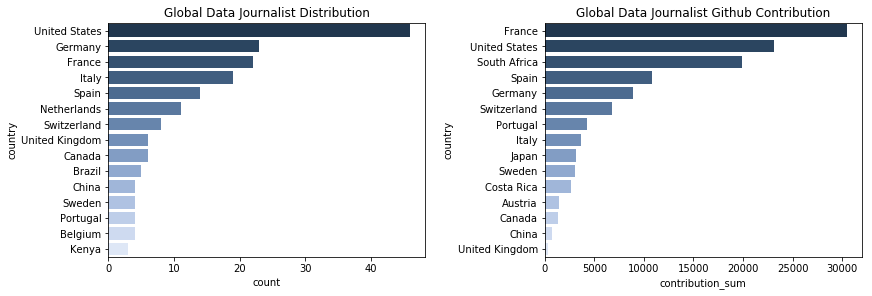

In [63]:
from matplotlib import pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=2,constrained_layout=True,figsize = (12,4))
ax1 = sns.barplot(
    x='count',
    y='country',
    data=df_code_country_data_j.sort_values(
        by=['count'], axis = 0, ascending = False
        ).head(15),
    palette=sns.cubehelix_palette(
        15, start=2.7, rot=0.04, dark=0.2, light=0.9, reverse=True
        ), #palette is like the color combination style
    saturation = 1,
    ax=axes[0])
ax1.set_title('Global Data Journalist Distribution', fontsize=12)

ax2 = sns.barplot(
    x='contribution_sum',
    y='country',
    data=df_code_country_data_c.sort_values(
        by=['contribution_sum'], axis = 0, ascending = False
        ).head(15),
    palette=sns.cubehelix_palette(
        15, start=2.7, rot=0.04, dark=0.2, light=0.9, reverse=True
        ), #palette is like the color combination style
    saturation = 1,
    ax=axes[1])
ax2.set_title('Global Data Journalist Github Contribution', fontsize=12)

Text(0.5,1,'Global Data Journalist Github Contribution (averaged by countries)')

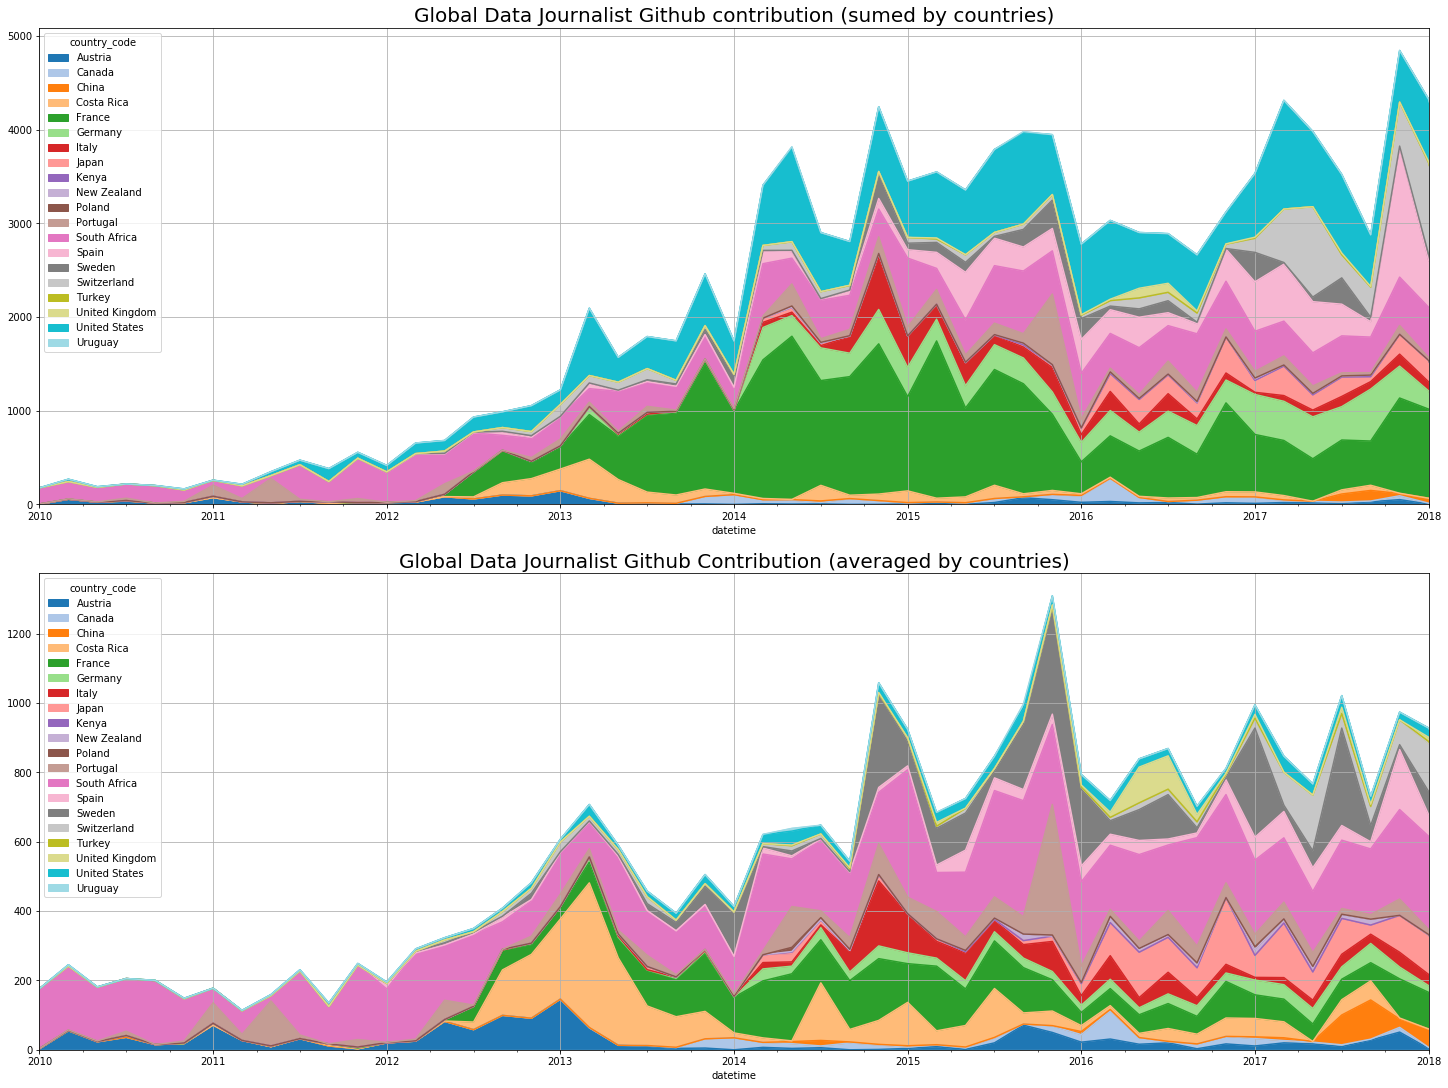

In [32]:
from matplotlib import pyplot as plt
import pandas as pd
from dateutil.parser import parse
df_d = df_gh.loc[:,'2018-10-31':'2008-01-01'].join(
    df_0d['country_code'].apply(code2country)
).groupby('country_code').aggregate('sum').T
df_d['dd'] = df_d.index
df_d['datetime'] = df_d['dd'].apply(parse)
df_d = df_d.set_index('datetime').resample('2M').aggregate('sum')
df_sum = df_d.T[df_d.sum() > 0].T

df_d = df_gh.loc[:,'2018-10-31':'2008-01-01'].join(
    df_0d['country_code'].apply(code2country)
).groupby('country_code').aggregate('mean').T
df_d['dd'] = df_d.index
df_d['datetime'] = df_d['dd'].apply(parse)
df_d = df_d.set_index('datetime').resample('2M').aggregate('sum')
df_mean = df_d.T[df_d.sum() > 0].T

fig, axes = plt.subplots(nrows=2, ncols=1,constrained_layout=True)
ax1 = df_sum.plot(
        kind = 'area',
    grid = True,
    figsize = (20,15),
    colormap = 'tab20',
    xlim = ('2010','2018'),
    ax=axes[0])
ax1.set_title('Global Data Journalist Github contribution (sumed by countries)', fontsize=20)

ax2 = df_mean.plot(
    kind = 'area',
    grid = True,
    figsize = (20,15),
    colormap = 'tab20',
    xlim = ('2010','2018'),
    ax=axes[1])
ax2.set_title('Global Data Journalist Github Contribution (averaged by countries)', fontsize=20)

In [74]:
df_0d.sort_values(by=['contribution_sum'], axis = 0, ascending = False).head(10)

,name,institution,city,github,country_code,contribution_sum
118,Friedrich Lindenberg,ICFJ,"Cape Town, South Africa",http://www.github.com/pudo,ZAF,17950
209,Pierre Romera,Journalism++,"Paris, France",http://www.github.com/pirhoo,FRA,10282
24,Edouard Richard,Journalism++,"Paris, France",http://www.github.com/vied12,FRA,9002
8,Martín González,Freelance,"Barcelona, Spain",https://www.github.com/martgnz,ESP,7951
102,Moritz Klack,webkid,"Berlin, Germany",http://www.github.com/moklick,DEU,6954
208,Pierre Bellon,Journalism++,"Paris, France",https://github.com/pbellon,FRA,6601
18,Jeremia Kimelman,Code for America,"San Francisco, United States",http://www.github.com/jeremiak,USA,6396
28,Thomas Preusse,Neue Zürcher Zeitung,"Zurich, Switzerland",http://www.github.com/tpreusse,CHE,5173
206,Paul Joannon,Journalism++,"Paris, France",http://www.github.com/paulloz,FRA,3795
43,Hunter Owens,NaN,"Chicago, United States",http://www.github.com/hunterowens,USA,3579


In [4]:
#美国求职市场分布
import plotly.plotly as py
import pandas as pd

df_selected_jobs = pd.read_csv("reference/0 jobs.csv")
list_state_code=[]
df_count=pd.read_csv('reference/US-States.csv',index_col='code').T
for i in df_selected_jobs["Location"]:
    try: 
        list_state_code.append(i.split(', ')[1][:2])
    except:
        pass
list_state_code
for i in range(len(list_state_code)):
    list_state_code[i]=list_state_code[i].upper()
    if list_state_code[i]=='D.' or list_state_code[i]=='DC':
        list_state_code[i]='VA'

for i in list_state_code:
    df_count[i][1]=list_state_code.count(i)
df_count
code=list(df_count.columns)
value=list(df_count.loc['data'])

scl = [[0.0, 'rgb(245,245,245)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,210)'],[0.8, 'rgb(117,107,200)'],[1.0, 'rgb(84,39,190)']]
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = code,
        z = value,
        locationmode = 'USA-states',
        text = code,
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "how many positions")
        ) ]

layout = dict(
        title = 'U.S journalism jobs',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

In [ ]:
import plotly.plotly as py
import pandas as pd

df_d0
df_d0['text'] = df['airport'] + '' + df['city'] + ', ' + df['state'] + '' + 'Arrivals: ' + df['cnt'].astype(str)

scl = [ [0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
    [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"] ]

data = [ dict(
        type = 'scattergeo',
        locationmode = 'ISO-3',
        lon = df_d0['long'],  #
        lat = df_d0['lat'],  #
        text = df_d0['text'],  #
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = scl,
            cmin = 0,
            color = df['cnt'],  #
            cmax = df['cnt'].max(),  #
            colorbar=dict(
                title="Incoming flightsFebruary 2011"
            )
        ))]

layout = dict(
        title = 'Most trafficked US airports<br>(Hover for airport names)',
        colorbar = True,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-airports' )

In [13]:
df_0d

,name,institution,city,github,country_code,contribution_sum
0,Julius Tröger,Berliner Morgenpost,"Berlin, Germany",NaN,DEU,0
1,Justin Myers,The Associated Press,"United States, Brooklyn (US-VA)",http://github.com/myersjustinc,USA,1147
2,Tolga Celik,Ege University,"Izmir, Turkey",NaN,TUR,0
3,Winnie Kamau,Africa Data Journalists Network,"Nairobi, Kenya",NaN,KEN,0
4,Annabel Church,NaN,"N/A, Germany",http://www.github.com/arc64,DEU,149
5,Nolan Markham,Vocativ,"New York City, United States",NaN,USA,0
6,Daichi Ito,The Huffington Post Japan,"Tokyo, Japan",NaN,JPN,0
7,Mina Demian,Africa Check,"Johannesburg, South Africa",http://www.github.com/minademian,ZAF,1982
8,Martín González,Freelance,"Barcelona, Spain",https://www.github.com/martgnz,ESP,7951
9,Ola Samzelius,UNT,"Stockholm, Sweden",NaN,SWE,0


In [30]:
import plotly.plotly as py
import pandas as pd

df_geo = pd.read_csv('reference/geopy-raw.csv')

df_geo['text'] = df_0d['name'] + '<br>institution:' + df_0d['institution'] + '<br>city:'\
+ df_0d['city'] + '<br>contribution:' + df_0d['contribution_sum'].astype(str)

scl = [ [0,"rgb(5, 10, 112)"],[0.4,"rgb(40, 60, 190)"],[0.55,"rgb(70, 100, 245)"],\
    [0.7,"rgb(90, 120, 245)"],[0.85,"rgb(106, 137, 247)"],[0.99,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"] ]

data = [ dict(
        type = 'scattergeo',
        locationmode = 'ISO-3',
        lon = df_geo['lon'],  #
        lat = df_geo['lat'],  #
        text = df_geo['text'],  #
        mode = 'markers',
        marker = dict(
            size = 10,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = scl,
            cmin = 0,
            color = df_0d['contribution_sum'],  #
            cmax = 2000,  #
            colorbar=dict(
                title="Incoming flightsFebruary 2011"
            )
        ))]

layout = dict(
        title = 'Most trafficked US airports<br>(Hover for airport names)',
        colorbar = True,
        geo = dict(
#             scope='usa',
#             projection=dict( type='albers usa' ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-airports' )

In [32]:
df_edu = pd.read_excel('reference/Education.xlsx')
df_edu

,1,ID,Title,Organisation,school/sub-org,Country,Full programme / Module,"Level (UG, PG)",Start year of prog/module,Latest offering,...,Long,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,2.0,BH1,Data Visualization,University of Nebraska-Lincoln,School of Journalism and Mass Communication,USA,Programme (Major),UG,NaN,2017,...,-96.700491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,BH10,Computer-Assisted Reporting,University of Maryland,NaN,USA,NaN,NaN,NaN,2012,...,-76.623000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,BH100,Data Visualization,Rice University,Department of Statistics,USA,Module,PG,NaN,2011,...,-95.404781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,BH101,Introduction to Data Analysis,Rice University,Department of Statistics,USA,Module,UG,NaN,2012,...,-95.404781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6.0,BH102,Programming R (Proposed),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,7.0,BH103,Advanced Reporting,University of North Carolina at Chapel Hill,School of Journalism and Mass Communication,USA,Module,UG,NaN,2008,...,-79.047376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,8.0,BH104,Research Techniques,University of Regina,School of Journalism,Canada,Module,UG,NaN,2017,...,-104.589000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,9.0,BH105,Data Journalism: The Basics,Kadir Has University,Faculty of Communication,Turkey,Module,PG,NaN,2018,...,-89.525360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10.0,BH106,Data Visualization,University of Texas at Austin,School of Journalism,USA,Module,PG,NaN,2016,...,-97.731956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,11.0,BH107,Data Skills,City University of New York,Graduate School of Journalism,USA,Module,PG,NaN,2017,...,-73.983639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
import plotly.plotly as py
import pandas as pd

df_geo = pd.read_excel('reference/Education.xlsx')

df_geo['text'] = df_0d['name'] + '<br>institution:' + df_0d['institution'] + '<br>city:'\
+ df_0d['city'] + '<br>contribution:' + df_0d['contribution_sum'].astype(str)

scl = [ [0,"rgb(5, 10, 112)"],[0.4,"rgb(40, 60, 190)"],[0.55,"rgb(70, 100, 245)"],\
    [0.7,"rgb(90, 120, 245)"],[0.85,"rgb(106, 137, 247)"],[0.99,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"] ]

data = [ dict(
        type = 'scattergeo',
        locationmode = 'ISO-3',
        lon = df_edu['Long'],  #
        lat = df_edu['Lat'],  #
        text = df_edu['Organisation'],  #
        mode = 'markers',
        marker = dict(
            size = 10,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = scl,
            cmin = 0,
            color = 1000,  #
            cmax = 2000,  #
            colorbar=dict(
                title="Incoming flightsFebruary 2011"
            )
        ))]

layout = dict(
        title = 'Most trafficked US airports<br>(Hover for airport names)',
        colorbar = True,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-airports' )

In [27]:
import plotly.plotly as py
import pandas as pd

df_geo = pd.read_csv('reference/geopy-raw.csv')

df_geo['text'] = df_0d['name'] + '<br>institution:' + df_0d['institution'] + '<br>city:'\
+ df_0d['city'] + '<br>contribution:' + df_0d['contribution_sum'].astype(str)

scl = [ [0,"rgb(5, 10, 112)"],[0.4,"rgb(40, 60, 190)"],[0.55,"rgb(70, 100, 245)"],\
    [0.7,"rgb(90, 120, 245)"],[0.85,"rgb(106, 137, 247)"],[0.99,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"] ]

data = [ dict(
        type = 'scattergeo',
        locationmode = 'ISO-3',
        lon = df_geo['lon'],  #
        lat = df_geo['lat'],  #
        text = df_geo['text'],  #
        mode = 'markers',
        marker = dict(
            size = 15,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = scl,
            cmin = 0,
            color = df_0d['contribution_sum'],  #
            cmax = 2000,  #
            colorbar=dict(
                title="Incoming flightsFebruary 2011"
            )
        ))]

layout = dict(
        title = 'Most trafficked US airports<br>(Hover for airport names)',
        colorbar = True,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-airports' )